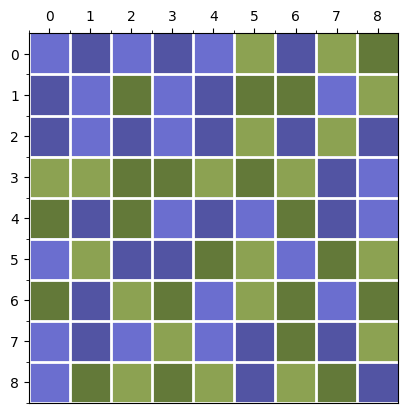

In [14]:
from gym_match3.envs import Match3Env

env = Match3Env(rollout_len=100)
env.render()

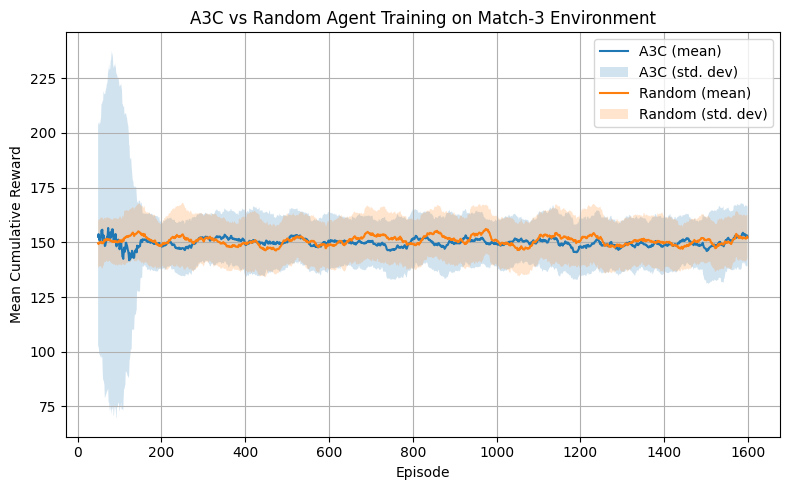

In [20]:
import pickle
from pathlib import Path
from matplotlib import pyplot as plt
import numpy as np

# path_a3c = Path("../scripts/episode_rewards_improved.pkl")
path_a3c = Path("../scripts/episode_rewards_a3c_paper.pkl")
path_random = Path("../scripts/episode_rewards_random.pkl")
paths = [path_a3c, path_random]
labels = ["A3C", "Random"]

plt.figure(figsize=(8, 5))
for path, label in zip(paths, labels):
    episode_rewards = pickle.load(path.open("rb"))
    episode_rewards = np.array(episode_rewards)
    window = 50  # Moving average window size
    if len(episode_rewards) >= window:
        means = np.convolve(episode_rewards, np.ones(window)/window, mode='valid')
        stds = np.array([
            episode_rewards[max(0, i-window+1):i+1].std()
            for i in range(window-1, len(episode_rewards))
        ])
        episodes = np.arange(window-1, len(episode_rewards))
    else:
        means = episode_rewards
        stds = np.zeros_like(episode_rewards)
        episodes = np.arange(len(episode_rewards))
    plt.plot(episodes, means, label=f"{label} (mean)")
    plt.fill_between(episodes, means - stds, means + stds, alpha=0.2, label=f"{label} (std. dev)")

plt.grid(True)
plt.xlabel("Episode")
# plt.xscale("log")
plt.ylabel("Mean Cumulative Reward")
plt.title("A3C vs Random Agent Training on Match-3 Environment")
plt.legend()
plt.tight_layout()
plt.show()

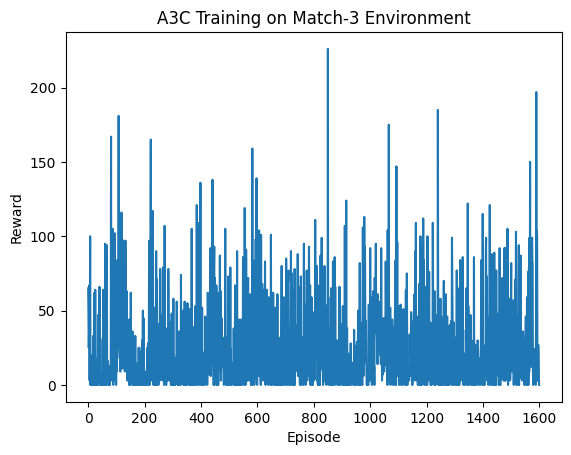

In [10]:
import pickle
from pathlib import Path
from matplotlib import pyplot as plt

# path = Path("../scripts/episode_rewards_improved_debug.pkl")
path = Path("../scripts/episode_rewards_improved.pkl")

episode_rewards = pickle.load(path.open("rb"))
plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("A3C Training on Match-3 Environment")
plt.show()

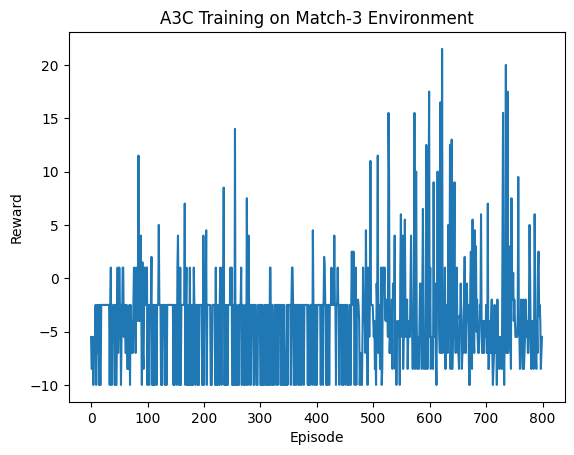

In [11]:
import pickle
from pathlib import Path
from matplotlib import pyplot as plt

# path = Path("../scripts/episode_rewards_improved_debug.pkl")
path = Path("../scripts/episode_rewards_improved.pkl")

episode_rewards = pickle.load(path.open("rb"))
plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("A3C Training on Match-3 Environment")
plt.show()

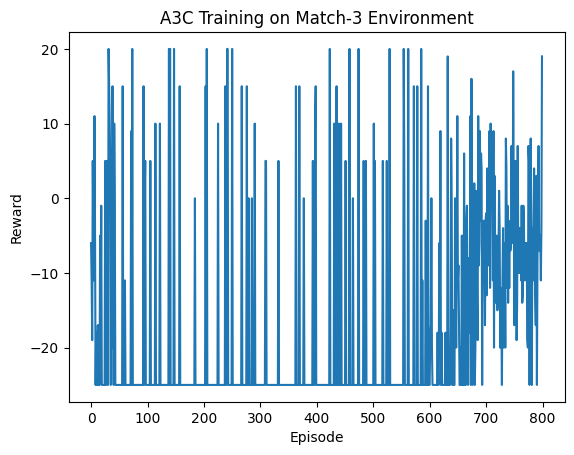

In [7]:
import pickle
from pathlib import Path
from matplotlib import pyplot as plt

# path = Path("../scripts/episode_rewards_improved_debug.pkl")
path = Path("../scripts/episode_rewards_improved.pkl")

episode_rewards = pickle.load(path.open("rb"))
plt.plot(episode_rewards)
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.title("A3C Training on Match-3 Environment")
plt.show()